(615, 285, 4)
(615, 285)


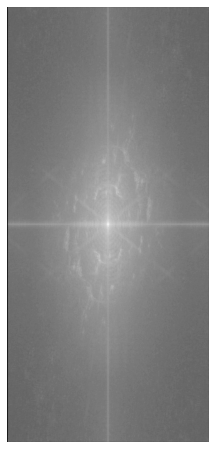

In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Midsem_2023')
from matplotlib.image import imread
A = imread(os.path.join('Q2Fourier_crop.png'))
F = np.mean(A, -1); # Convert RGB to grayscale
print(np.shape(A))
print(np.shape(F))
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

In [2]:
import math
# Since the given image is in the log scale, we need to convert into normal scale.
# Reverse the log scale
Btshift = (np.exp(F)-1)/math.sqrt(2)
print(np.shape(Btshift))
# Reverse the FFT shift
Bt = np.fft.ifftshift(Btshift)
print(np.shape(Bt))

# Now, At contains the complex values of the Fourier transform of the original image



(615, 285)
(615, 285)


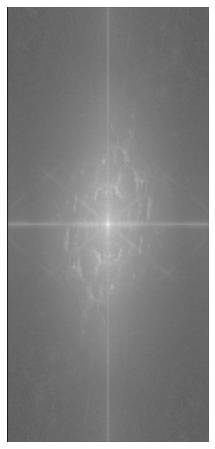

In [3]:
F = np.log(np.abs(np.fft.fftshift(Bt))+1) # Put FFT on log scale
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

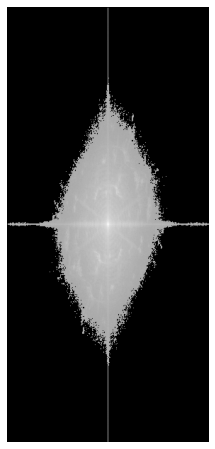

In [4]:


## Zero out all small coefficients and inverse transform
A = np.sort(np.abs(np.reshape(Btshift,-1)))
keep = 0.2
thresh = A[int(np.floor((1-keep)*len(A)))]
ind = np.abs(Btshift) > thresh
# nx,ny = F.shape
# X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))
# R2 = np.power(X,2) + np.power(Y,2)
# ind = R2 < 150**2

Btshift = Btshift*ind
Flow = np.log(np.abs(Btshift)+1) # Put FFT on log scale

plt.imshow(Flow,cmap='gray')
plt.axis('off')
plt.show()



(615, 285)


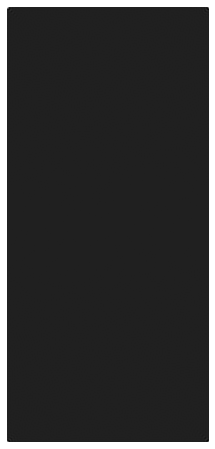

In [5]:


## Plot Reconstruction
Bt = np.fft.ifftshift(Btshift)
Alow = np.fft.ifft2(Bt).real
print(np.shape(Alow))
plt.imshow(Alow, cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
B = Alow; # Convert RGB to grayscale
Bt= np.fft.fft2(B)
Btshift= np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift)+1)
plt.imshow(F, cmap= 'gray')
plt.axis('off')
plt.show()

I believe the data cannot be determined because, the fourier coefficients given are the absolute values of the complex numbers and backtracking the data from that is not possible and can only be determined if any information related to phasor angle is given. I have tried to determine the original image from the fourier coefficients using an example in the python notebook, 

### Q2- reasoning.ipynb